In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import random as rd

In [2]:
import chardet    
rawdata = open('GercekZamanliTuketim-01012016-30112020.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

ISO-8859-1


In [3]:
df = pd.read_csv('GercekZamanliTuketim-01012016-30112020.csv', encoding = 'ISO-8859-1')
df = df.rename(columns={'Tarih': 'Date', 'Saat':'Hour','Tüketim Miktarý (MWh)':'Consumption'})
df["Hour"] = df["Hour"].str.replace(':00','').astype(int) #To filter it easily for the upcoming tasks.
df["Consumption"] = df["Consumption"].str.replace('.','').str.replace(',','.').astype(float) #To make calculations.
df.head(5)

,Date,Hour,Consumption
0,01.01.2016,0,26277.24
1,01.01.2016,1,24991.82
2,01.01.2016,2,23532.61
3,01.01.2016,3,22464.78
4,01.01.2016,4,22002.91


In [4]:
df["Date"]= pd.to_datetime(df["Date"])
df.head(5)

,Date,Hour,Consumption
0,2016-01-01,0,26277.24
1,2016-01-01,1,24991.82
2,2016-01-01,2,23532.61
3,2016-01-01,3,22464.78
4,2016-01-01,4,22002.91


Original data only contains objects (strings) so I manipulated columns named Date, Hour and Consumption as datetime, integer and float data, respectively. As a result, I can use consumption data to calculate for upcoming questions.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43104 entries, 0 to 43103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         43104 non-null  datetime64[ns]
 1   Hour         43104 non-null  int32         
 2   Consumption  43104 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 842.0 KB


I checked to see whether there is any null data.

In [6]:
print(df['Date'].isnull().values.any())
print(df['Hour'].isnull().values.any())
print(df['Consumption'].isnull().values.any())

False
False
False


In [7]:
df["Date"].value_counts()

2017-03-24    24
2017-04-16    24
2016-08-21    24
2018-12-03    24
2017-10-01    24
              ..
2018-02-28    24
2020-03-15    24
2018-01-29    24
2016-06-06    24
2016-10-23    24
Name: Date, Length: 1796, dtype: int64

Each of the dates has 24 hours.

In [8]:
df["Hour"].value_counts()

4     1797
23    1796
22    1796
1     1796
2     1796
5     1796
6     1796
7     1796
8     1796
9     1796
10    1796
11    1796
12    1796
13    1796
14    1796
15    1796
16    1796
17    1796
18    1796
19    1796
20    1796
21    1796
0     1796
3     1795
Name: Hour, dtype: int64

It seems like there is misinformation in the data. To locate misleading data, I counted the dates for 04:00.

In [9]:
df.loc[df["Hour"]==4,"Date"].value_counts()

2016-03-27    2
2018-01-05    1
2016-02-02    1
2020-05-15    1
2020-07-26    1
             ..
2017-10-24    1
2018-06-25    1
2018-03-12    1
2018-04-16    1
2020-10-02    1
Name: Date, Length: 1796, dtype: int64

In [10]:
df.loc[df["Date"]=="2016-03-27"].head(5)

,Date,Hour,Consumption
2064,2016-03-27,0,27424.42
2065,2016-03-27,1,25949.63
2066,2016-03-27,2,0.00
2067,2016-03-27,4,24776.94
2068,2016-03-27,4,24776.94


The consumption value of 03:00 is missing and the consumption value of 04:00 is repeating itself. Therefore, I replaced the first repeating hour and its consumption value with 03:00 and mean of consumption value at 03:00.

Now misleading data is cleaned from original data.

In [11]:
df.loc[df["Date"]=="2016-03-27"]
df.iloc[2067,2] = df.loc[df["Hour"]==3,"Consumption"].mean()
df.iloc[2067,1] = 3
df.loc[df["Date"]=="2016-03-27"].head(5)

,Date,Hour,Consumption
2064,2016-03-27,0,27424.420000
2065,2016-03-27,1,25949.630000
2066,2016-03-27,2,0.000000
2067,2016-03-27,3,27720.540557
2068,2016-03-27,4,24776.940000


To establish dataframe with lagged data, I simply shifted the dates as new columns and then I located between row number 45 and 170 in order to see visually if I could achieved concatenate data correctly.

In [12]:
lag_df = pd.concat([df, df.shift(48), df.shift(168)], axis=1)
lag_df.iloc[45:170]

,Date,Hour,Consumption,Date,Hour,Consumption,Date,Hour,Consumption
45,2016-02-01,21,31049.20,NaT,NaN,NaN,NaT,NaN,NaN
46,2016-02-01,22,30906.43,NaT,NaN,NaN,NaT,NaN,NaN
47,2016-02-01,23,29621.09,NaT,NaN,NaN,NaT,NaN,NaN
48,2016-03-01,0,27613.96,2016-01-01,0.0,26277.24,NaT,NaN,NaN
49,2016-03-01,1,25779.28,2016-01-01,1.0,24991.82,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...
165,2016-07-01,21,32638.14,2016-05-01,21.0,33400.82,NaT,NaN,NaN
166,2016-07-01,22,32739.98,2016-05-01,22.0,33359.37,NaT,NaN,NaN
167,2016-07-01,23,31092.87,2016-05-01,23.0,31629.97,NaT,NaN,NaN
168,2016-08-01,0,28602.02,2016-06-01,0.0,29189.27,2016-01-01,0.0,26277.24


Since there is not any data before 2016-01-01, the first week (first 168 row) includes empty data. 

In [13]:
print(lag_df['Date'].isnull().values.any())
print(lag_df['Hour'].isnull().values.any())
print(lag_df['Consumption'].isnull().values.any())

True
True
True


There may be lots of way to manipulate the null data. For example, it can be replaced with zeros or with hourly or weekly average data. I preferred to erase the related week since it is insignificant when it is compared to 5 year. To double check if there is any other data lost, I calculate them manually. There was 43.104 rows at the beginning and there should only be 168 null data. As a result, there should be 42.936 rows at the end. And, there is! 

In [14]:
lag_df.dropna(inplace = True)
lag_df.head(5)

,Date,Hour,Consumption,Date,Hour,Consumption,Date,Hour,Consumption
168,2016-08-01,0,28602.02,2016-06-01,0.0,29189.27,2016-01-01,0.0,26277.24
169,2016-08-01,1,27112.37,2016-06-01,1.0,27614.02,2016-01-01,1.0,24991.82
170,2016-08-01,2,25975.34,2016-06-01,2.0,26578.97,2016-01-01,2.0,23532.61
171,2016-08-01,3,25315.55,2016-06-01,3.0,25719.19,2016-01-01,3.0,22464.78
172,2016-08-01,4,25128.15,2016-06-01,4.0,25864.63,2016-01-01,4.0,22002.91


In [15]:
columns = ['Date','Hour','Consumption','Lag48','Lag168']
nlag_df = pd.DataFrame(columns=columns)
nlag_df["Date"]=lag_df.iloc[:, 0].copy()
nlag_df["Hour"]=lag_df.iloc[:, 1].copy()
nlag_df["Consumption"]=lag_df.iloc[:, 2].copy()
nlag_df["Lag48"]=lag_df.iloc[:, 5].copy()
nlag_df["Lag168"]=lag_df.iloc[:, 8].copy()

# Section A
Task: Assume that you are willing to use 168 and 48 hours ago consumption values as your naïve
approaches to predict next day’s consumption. Suppose the test period includes the dates after 1st of
November, 2020 (included). For both approaches, report the summary statistics of MAPE values
for the test period.

In [16]:
nlag_df.head(5)

,Date,Hour,Consumption,Lag48,Lag168
168,2016-08-01,0,28602.02,29189.27,26277.24
169,2016-08-01,1,27112.37,27614.02,24991.82
170,2016-08-01,2,25975.34,26578.97,23532.61
171,2016-08-01,3,25315.55,25719.19,22464.78
172,2016-08-01,4,25128.15,25864.63,22002.91


In [17]:
days = 30*24
test_df = nlag_df.iloc[-days:].copy()
test_df.head(5)

,Date,Hour,Consumption,Lag48,Lag168
42384,2020-01-11,0,28701.62,29066.51,29481.33
42385,2020-01-11,1,27254.15,27838.89,28002.28
42386,2020-01-11,2,26078.57,26940.11,27115.39
42387,2020-01-11,3,25449.47,26260.80,26415.11
42388,2020-01-11,4,25324.01,26097.96,26075.07


In [18]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [19]:
MAPE_lag48 = MAPE(test_df.Consumption.to_numpy(), test_df.Lag48.to_numpy())
print("MAPE Value of Naive Forecasting:Lag 48 is {}".format(MAPE_lag48))
MAPE_lag168 = MAPE(test_df.Consumption.to_numpy(), test_df.Lag168.to_numpy())
print("MAPE Value of Naive Forecasting:Lag 168 is {}".format(MAPE_lag168))

MAPE Value of Naive Forecasting:Lag 48 is 7.789204389494435
MAPE Value of Naive Forecasting:Lag 168 is 3.4536690170083455


With the corresponding MAPE values, it seems that the naive forecasting with the data of 1 week ago has better results compared to the data of 2 days ago. We can say that the data of a week ago at the same hour is more useful for the prediction.

# Section B
Task: Instead of using the lag consumptions in part (a) as a forecast, we would like to treat them as our features and build a linear regression model. The illustration of the data format for this prediction problem is given in Figure 1. This representation is so called “long” format. Train your model using the data till 1st of November, 2020 and test on the rest. Your linear regression model is expected to include aforementioned two features (i.e. Lag_48 and Lag_168) and an intercept. Report the summary statistics of MAPE values for the test period.


In [20]:
train_df = nlag_df.iloc[:-days].copy()
train_df

,Date,Hour,Consumption,Lag48,Lag168
168,2016-08-01,0,28602.02,29189.27,26277.24
169,2016-08-01,1,27112.37,27614.02,24991.82
170,2016-08-01,2,25975.34,26578.97,23532.61
171,2016-08-01,3,25315.55,25719.19,22464.78
172,2016-08-01,4,25128.15,25864.63,22002.91
...,...,...,...,...,...
42379,2020-10-31,19,35265.95,34767.13,36009.65
42380,2020-10-31,20,34178.92,33868.97,35062.32
42381,2020-10-31,21,33240.21,32670.05,33936.24
42382,2020-10-31,22,32159.28,31874.30,32906.62


In [21]:
X_train = train_df[['Lag48', 'Lag168']].to_numpy()
y_train = train_df[['Consumption']].to_numpy()
X_test = test_df[['Lag48', 'Lag168']].to_numpy()
y_test = test_df[['Consumption']].to_numpy()

In [22]:
from sklearn.linear_model import LinearRegression

Linear Regression modelled with Lag 48 and Lag 168.

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
lm.coef_

array([[0.30841204, 0.64352398]])

In [26]:
prediction = lm.predict(X_test)

In [27]:
print(lm.intercept_)

[1574.00813713]


In [28]:
print("MAPE Value with Linear Regression is {}".format(MAPE(y_test, prediction)))


MAPE Value with Linear Regression is 4.122176505891631


In [29]:
MAPE(y_test, prediction)

4.122176505891631

It is interesting that even if linear regression resulted better than the naive forecasting with the datas of 2 days ago, it is not better than the MAPE value of naive forecasting with the datas of 1 week ago.

As a result, I can say that predicting with naive forecasting with weekly data works better than linear regression. It shows that consumption value of last week's same hour is critical for forecasting.

# Section C
Task: As mentioned earlier, hourly seasonality is important. Although we used the same hour’s consumption value of the past days to handle this problem for part (b), we implicitly impose an assumption that prediction model for each hour has the same coefficients which may not be correct since the consumption behavior at nights can be different than the other hours. Therefore, modeling each hour separately is another way to approach to the same problem. Train linear regression models for each hour using the same training period (24 models) and report your test performance as in part (a).


In [30]:
hours = np.arange(0, 24, 1)
MAPE_df = pd.DataFrame(hours, columns=['Hour'])
MAPE_df['MAPE_values'] = ""
MAPE_df

for i in hours:
    ftrain_df = train_df.loc[(train_df['Hour'] == i)] #filtered train data
    ftest_df = test_df.loc[(test_df['Hour'] == i)] #filtered test data
    X_train = ftrain_df[['Lag48', 'Lag168']].to_numpy()
    y_train = ftrain_df[['Consumption']].to_numpy()
    X_test = ftest_df[['Lag48', 'Lag168']].to_numpy()
    y_test = ftest_df[['Consumption']].to_numpy()
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    prediction = lm.predict(X_test)
    MAPE_df.iloc[i,1] = MAPE(y_test, prediction)

In [31]:
print('Min MAPE Value of Linear Regression is', MAPE_df['MAPE_values'].min())
print('Max MAPE Value of Linear Regression is', MAPE_df['MAPE_values'].max())

Min MAPE Value of Linear Regression is 3.111259913798017
Max MAPE Value of Linear Regression is 6.355180482822785


It seems like there are better results for certain hours compared to naive forcesting with weekly data.

In [32]:
MAPE_df.loc[(MAPE_df['MAPE_values'] < MAPE_lag168)]

,Hour,MAPE_values
0,0,3.2669
1,1,3.26999
2,2,3.38531
3,3,3.19455
4,4,3.16809
5,5,3.15663
6,6,3.13134
19,19,3.38158
20,20,3.11745
21,21,3.11126


In [33]:
MAPE_df.loc[(MAPE_df['MAPE_values'] < MAPE_lag168)].count()

Hour           12
MAPE_values    12
dtype: int64

Now each hour has different coefficient so I expect the prediction to be better. In fact, I would expect most of the results to be better than naive forecasting as it is focused on the hours and the idea of it is seemed to be very consistent. However, just half of them have better MAPE values. Generally, naive forecasting still seems to be working fine. 

# Section D
Task: Assume that you have 48 features (hourly consumption from two days ago and last week’s hourly consumption) in total. You are also willing to follow the same logic in part (c) and build a prediction model for each hour separately. Since there is a strong correlation (actually an autocorrelation) between these predictors, you are willing to use penalized regression approaches for modeling. Use L1 penalty in your regression models for each hour. Note that the feature matrix will be the same for all your models, only the target variable will change for this task. In order to determine the regularization parameter (i.e. lambda), perform a 10-fold cross-validation.
Train penalized regression models with L1 penalty (i.e. lasso regression) for each hour using the same training period (24 models) and report your test performance as in part (a). Also comment on the resulting models (i.e. coefficients and etc.).

In [34]:
nlag_df.head(5)

,Date,Hour,Consumption,Lag48,Lag168
168,2016-08-01,0,28602.02,29189.27,26277.24
169,2016-08-01,1,27112.37,27614.02,24991.82
170,2016-08-01,2,25975.34,26578.97,23532.61
171,2016-08-01,3,25315.55,25719.19,22464.78
172,2016-08-01,4,25128.15,25864.63,22002.91


In [35]:
nlag_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42936 entries, 168 to 43103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         42936 non-null  datetime64[ns]
 1   Hour         42936 non-null  int32         
 2   Consumption  42936 non-null  float64       
 3   Lag48        42936 non-null  float64       
 4   Lag168       42936 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 1.8 MB


In [36]:
wide48_df = nlag_df.pivot(index='Date',columns='Hour',values='Lag48')
wide168_df = nlag_df.pivot(index='Date',columns='Hour',values='Lag168')
wide48_df = wide48_df.reset_index()
wide168_df = wide168_df.reset_index()
wide48_df.loc[(wide48_df['Date'] == "2016-01-08")]

Hour,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
6,2016-01-08,34781.66,33026.1,31637.18,30876.62,30264.22,28931.79,28504.85,29920.41,33763.31,...,39269.96,38907.75,38217.42,36923.21,35947.54,35961.09,36972.61,36845.87,36389.31,34980.42


In [37]:
df.head(5)

,Date,Hour,Consumption
0,2016-01-01,0,26277.24
1,2016-01-01,1,24991.82
2,2016-01-01,2,23532.61
3,2016-01-01,3,22464.78
4,2016-01-01,4,22002.91


In [38]:
wide_n_df = df.merge(wide48_df, on='Date').merge(wide168_df, on='Date')
wide_n_df.columns = wide_n_df.columns.str.replace(r"[x]", "_Lag48")
wide_n_df.columns = wide_n_df.columns.str.replace(r"[y]", "_Lag168")
wide_n_df.columns

Index(['Date', 'Hour', 'Consumption', '0__Lag48', '1__Lag48', '2__Lag48',
       '3__Lag48', '4__Lag48', '5__Lag48', '6__Lag48', '7__Lag48', '8__Lag48',
       '9__Lag48', '10__Lag48', '11__Lag48', '12__Lag48', '13__Lag48',
       '14__Lag48', '15__Lag48', '16__Lag48', '17__Lag48', '18__Lag48',
       '19__Lag48', '20__Lag48', '21__Lag48', '22__Lag48', '23__Lag48',
       '0__Lag168', '1__Lag168', '2__Lag168', '3__Lag168', '4__Lag168',
       '5__Lag168', '6__Lag168', '7__Lag168', '8__Lag168', '9__Lag168',
       '10__Lag168', '11__Lag168', '12__Lag168', '13__Lag168', '14__Lag168',
       '15__Lag168', '16__Lag168', '17__Lag168', '18__Lag168', '19__Lag168',
       '20__Lag168', '21__Lag168', '22__Lag168', '23__Lag168'],
      dtype='object')

In [39]:
from sklearn.linear_model import LassoCV

In [40]:
wMAPE_df = pd.DataFrame(hours, columns=['Hour'])
wMAPE_df['MAPE_values'] = ""

wtrain_df = wide_n_df.iloc[:-days].copy()
wtest_df = wide_n_df.iloc[-days:].copy()

for i in hours:
    fwtrain_df = wtrain_df.loc[(wtrain_df['Hour'] == i)] #filtered train data
    fwtest_df = wtest_df.loc[(wtest_df['Hour'] == i)] #filtered test data
    
    X_train = fwtrain_df[fwtrain_df.columns[3:51]].to_numpy()
    y_train = fwtrain_df[['Consumption']].to_numpy()
    
    X_test = fwtest_df[fwtest_df.columns[3:51]].to_numpy()
    y_test = fwtest_df[['Consumption']].to_numpy()
    
    reg = LassoCV(cv=10, random_state=0, max_iter = 10000, normalize=True).fit(X_train, y_train.ravel())
    reg.score(X_train, y_train)
    prediction = reg.predict(X_test)
    wMAPE_df.iloc[i,1] = MAPE(y_test, prediction)

In [41]:
prediction.shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, prediction.shape)

(1759, 48) (30, 48) (1759, 1) (30, 1) (30,)


In [42]:
wMAPE_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
MAPE_values,5.51392,5.52948,5.51441,5.40643,5.37808,5.51272,5.88859,7.73099,10.92,12.0715,...,10.4114,10.0759,9.53917,8.54098,6.68697,5.79272,5.37639,5.30113,5.33266,5.52593


LassoCV implementation includes standardization and I set number of max iterations to 10000 to prevent convergence problem. Lasso implementation gave the worst results compare to naive forecasting with weekly data and linear regression. Penalized regression does not work better than linear regression for this dataset. With this results, I would prefer to use naive forecasting or linear regression.

# Section F
Task: Compare the results drawing a boxplot of MAPE values for each approach on same plot. Comment on your findings.

In [43]:
all_MAPE = pd.DataFrame(index=range(0,23), columns=['Naive Forecasting (2 Days)','Naive Forecasting (1 Week)','Linear Regression','Lasso Regression'])
all_MAPE['Linear Regression'] = MAPE_df["MAPE_values"]
all_MAPE['Lasso Regression'] = wMAPE_df["MAPE_values"]
all_MAPE.iloc[0,0] = MAPE_lag48
all_MAPE.iloc[0,1] = MAPE_lag168
all_MAPE

,Naive Forecasting (2 Days),Naive Forecasting (1 Week),Linear Regression,Lasso Regression
0,7.7892,3.45367,3.2669,5.51392
1,NaN,NaN,3.26999,5.52948
2,NaN,NaN,3.38531,5.51441
3,NaN,NaN,3.19455,5.40643
4,NaN,NaN,3.16809,5.37808
5,NaN,NaN,3.15663,5.51272
6,NaN,NaN,3.13134,5.88859
7,NaN,NaN,3.74745,7.73099
8,NaN,NaN,4.59035,10.92
9,NaN,NaN,5.29984,12.0715


In [45]:
import seaborn as sns

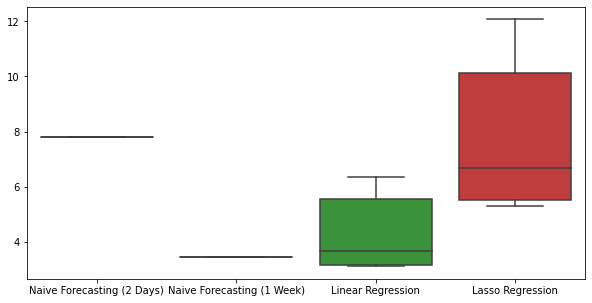

In [46]:
#sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(data=all_MAPE)
plt.show()

Naive forecasting MAPE values are only added for visual inspection. As it is clear that "naive forecasting based on last week's data" is much better than most of them. In my implementation, "Linear regression" gives better results compared to Lasso Regression and naive forecasting based on the data of 2 days ago. Consequently, both of them seems to be useful but naive forecasting is much less complex.

# References
[1] https://ibf.org/knowledge/glossary/mape-mean-absolute-percentage-error-174

[2] https://stackoverflow.com/questions/56315468/replace-comma-and-dot-in-pandas/56315638

[3] https://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe

[4] https://www.askpython.com/python/examples/mape-mean-absolute-percentage-error
